In [1]:
from __future__ import print_function

%matplotlib inline
%precision 16

import numpy
import numpy as np
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 2: BVP Problems 1

## Question 1

Consider the convection-diffusion problem defined by
$$
    u_t + au_x = \kappa u_{xx} + \psi(x)
$$
This is similar to the heat conduction problem except that we also have a convective term $a~u_x$.  You can think of $u(x,t)$ as describing the distribution of dye in a stream flowing at velocity $a$ where $\kappa$ describes how quickly the dye diffuses and $\psi(x)$ represents dye being added to the stream.

Considering the steady state solution of the problem above leads to the ODE
$$
    \epsilon u''(x) - u'(x) = f(x)
$$
where $\epsilon$ represents the relative strength of the advective and diffusive effects.

We will solve this problem with the domain and boundary conditions
$$
    \Omega = [0, 1] ~~~~ u(0)=\alpha ~~~~ u(1)=\beta ~~~~ f(x) = -1
$$
whose true solution is
$$
    u(x) = \alpha + x + (\beta - \alpha -1) \left( \frac{e^{x / \epsilon} - 1}{e^{1 / \epsilon} - 1} \right ).
$$

**(a)** [5] Show that the true solution is actually correct.

### Solution

$$u'(x) = 1 + \left(\frac{(\beta - \alpha - 1)}{e^{1/\epsilon} - 1}\right) \left(\frac{1}{\epsilon} \right)(e^{x/\epsilon} - 1)$$

And:

$$\epsilon u''(x) = \left(\frac{(\beta - \alpha - 1)}{e^{1/\epsilon} - 1}\right) \left(\frac{1}{\epsilon} \right)(e^{x/\epsilon} - 1) $$

Looking at $\epsilon u''(x) - u'(x)$, the large expression cancels and we're left with $-1$ and it checks out since $f(x)=-1$

Check BC:

$$u(0) = \alpha + 0 + (\beta - \alpha - 1)\left(\frac{e^0 - 1}{e^{1/\epsilon} - 1}\right) = \alpha $$
$$u(1) = \alpha + 1 + (\beta - \alpha - 1)(1) = \beta $$

We have verified that the solution is correct.

**(a)** [15] Discretize the boundary value problem presented using at least second order finite difference methods.  Make sure to pick the appropriate finite difference approach at the boundaries.

In [2]:
def solve_adv_diff(alpha, beta, epsilon, m):
    """Solve the steady-state advection-diffusion problem
    
    :Input
     - *alpha* (float) - Value that defines the BC at x = 0
     - *beta* (float) - Value that defines the BC at x = 1
     - *epsilon* (float) - The ratio of the advection speed and diffusivity
     - *m* (int) - Number of grid points to use
     
    :Output:
     - *x* (ndarray) - Location of grid points used including boundaries
     - *U* (ndarray) - Solution array including boundary conditions (m + 2)
    """
    # YOUR CODE HERE
    a = 0
    b = 1
    x = np.linspace(a, b, m + 2)
    dx = 1.0/(m+1)

    # Matrix Construction + Solving
    A = np.zeros((m, m))
    diagonal = epsilon * np.ones(m) / dx**2
    A += np.diag(diagonal * -2.0, 0)
    A += np.diag(diagonal[:-1] - 1.0/(2.0 * dx), 1)
    A += np.diag(diagonal[:-1] + 1.0/(2.0 * dx), -1)

    b = -1.0 * np.ones(m)
    b[0] -= epsilon * alpha/dx**2 + alpha/(2 * dx)
    b[-1] -= epsilon * beta/dx**2 - beta/(2 * dx)

    U = np.empty(m + 2)
    U[0] = alpha
    U[-1] = beta
    U[1:-1] = np.linalg.solve(A, b)
    
    return x, U

8.130805084462166e-05
Success!


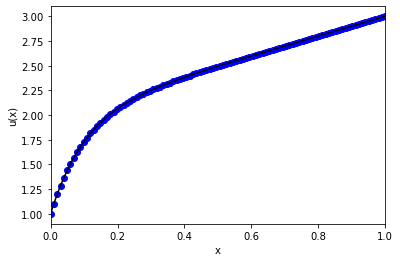

In [3]:
alpha = 1.0
beta = 3.0
epsilon = -0.1
u_true = lambda x: alpha + x + (beta - alpha - 1.0) * (numpy.exp(x / epsilon) - 1.0) / (numpy.exp(1.0 / epsilon) - 1.0)
x, U = solve_adv_diff(alpha, beta, epsilon, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, U, 'bo')
axes.plot(x, u_true(x), 'k')
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
axes.set_xlim((0.0, 1.0))

error = numpy.linalg.norm((x[1] - x[0]) * (U - u_true(x)), ord=1)
print(error)
assert(error < 1e-4)
print("Success!")

**(b)** [15] Using your function from part (a) explore the parameter space a bit by varying $m$ and $\epsilon$.  Suggested values to explore include $m \in [10, 100]$ and $\epsilon \in [-0.01, -1.0]$.

Describe what you observe with both plots and written observations.  In particular do your solutions seem physically reasonable?  If your code has difficulties explain why it might be having issues.

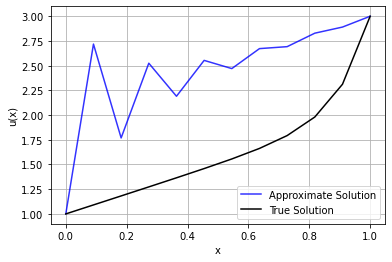

In [4]:
a = 0.0
b = 1.0
alpha = 1.0
beta = 3.0
epsilon = 0.1
u_true = lambda x: alpha + x + (beta - alpha - 1.0) * (numpy.exp(x / epsilon) - 1.0) / (numpy.exp(1.0 / epsilon) - 1.0)

# YOUR CODE HERE
x, U = solve_adv_diff(alpha, beta, epsilon=-0.01, m=10)
plt.plot(x, U, 'b', alpha=0.8, label='Approximate Solution')
plt.plot(x, u_true(x), 'k', alpha=1, label='True Solution')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()

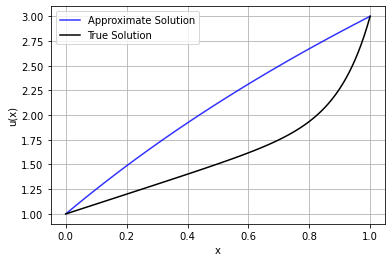

In [5]:
x, U = solve_adv_diff(alpha, beta, epsilon=-1.0, m=100)
plt.plot(x, U, 'b', alpha=0.8, label='Approximate Solution')
plt.plot(x, u_true(x), 'k', alpha=1, label='True Solution')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()

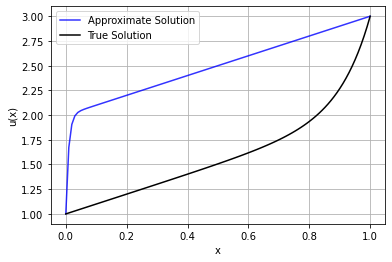

In [6]:
x, U = solve_adv_diff(alpha, beta, epsilon=-0.01, m=100)
plt.plot(x, U, 'b', alpha=0.8, label='Approximate Solution')
plt.plot(x, u_true(x), 'k', alpha=1, label='True Solution')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()

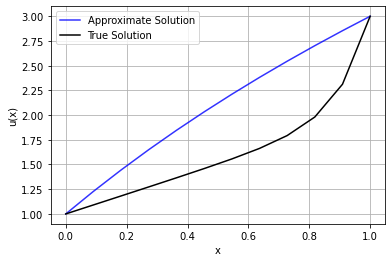

In [7]:
x, U = solve_adv_diff(alpha, beta, epsilon=-1, m=10)
plt.plot(x, U, 'b', alpha=0.8, label='Approximate Solution')
plt.plot(x, u_true(x), 'k', alpha=1, label='True Solution')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()

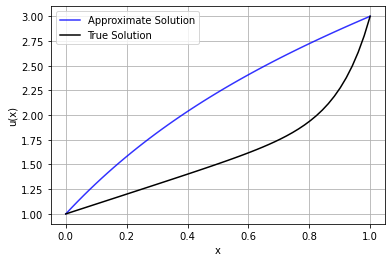

In [8]:
x, U = solve_adv_diff(alpha, beta, epsilon=-0.5, m=50)
plt.plot(x, U, 'b', alpha=0.8, label='Approximate Solution')
plt.plot(x, u_true(x), 'k', alpha=1, label='True Solution')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()

### Solution:

I noticed with larger $\epsilon$ & $m$, the plots look very sharp and smooths out as $\epsilon$ gets smaller and $m$ gets larger. I varied the parameter space but the true solution & approximation solution doesn't seem to agree anywhere except at $x=0$ and $x=1$

## Question 2

Consider the following BVP:
$$
    u''(x) + u(x) = 0 \quad \quad x \in \Omega = (a, b) \\
    u(a) = \alpha \quad u(b) = \beta
$$
where $L = b - a$.

**(a)** [10] What is the exact solution of the BVP?

### Solution:

This is a second order ODE, and it's characteristic yields the solutions $\pm i$ so it is known that our solution is in the form:

$$u(x) = c_1 cos(x) + c_2 sin(x)$$

All is left is to solve for $c_1$ and $c_2$ using our given boundary conditions. We have that:

$$ c_1 cos(a) + c_2 sin(a) = \alpha$$

Solving for $c_1$ yields:

$$c_1 = \frac{\alpha}{cos(a)} - c_2 tan(a)$$

Likewise, we can obtain a similar expression for $c_2$:

$$c_2 = \frac{\beta}{cos(b)} - c_2 tan(b)$$

Plugging in $c_2$ in the expression for for $c_1$ expression gives:

$$c_1 = \frac{\alpha}{cos(a)} - tan(a)\left(\frac{\alpha}{cos(b)} - c_1 tan(b)\right)$$
$$\implies c_1 = \frac{\alpha tan(a)sec(b)-\alpha sec(a)}{tan(a)tan(b)-1}$$

$c_2$ can be derived in a similar fashion.

**(b)** [15] Write a function that solves this equation using a finite difference approximation.

In [9]:
def solve_linear_pendulum(a, b, alpha, beta, m):
    """Solve u'' + u = 0 with x \in (a, b) and u(a) = \alpha, u(b) = \beta
    
    Returns the points the solution was approximated at including the boundaries and
    the solution
    """
    # YOUR CODE HERE
    x = np.linspace(a, b, m + 2)
    dx = 1.0/(m + 1)
    
    # Matrix Construction & Solving
    A = np.zeros((m, m))
    diagonal = np.ones(m)
    A += np.diag((dx**2 - 2.) * diagonal, 0)
    A += np.diag(diagonal[:-1], 1)
    A += np.diag(diagonal[:-1], -1)
    
    b = np.zeros(m)
    b[0] -= alpha
    b[-1] -= beta
     
    U = np.empty(m + 2)
    U[0] = alpha 
    U[-1] = beta 
    U[1:-1] = np.linalg.solve(A, b)
    return x, U

Error =  2.1017625588177483e-06
Success!


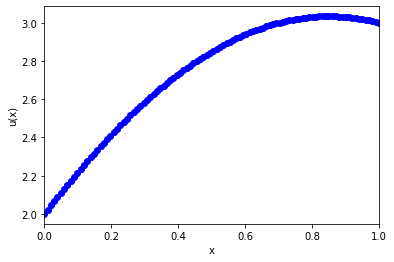

In [10]:
a = 0.0
b = 1.0
alpha = 2.0
beta = 3.0
C1 = (alpha - beta * numpy.sin(a) / numpy.sin(b)) / (numpy.cos(a) - numpy.sin(a) / numpy.tan(b))
C2 = beta / numpy.sin(b) - C1 / numpy.tan(b)
u_true = lambda x: C1 * numpy.cos(x) + C2 * numpy.sin(x)
x, U = solve_linear_pendulum(a, b, alpha, beta, 100)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, u_true(x), 'k')
axes.plot(x, U, 'ob')
axes.set_xlim(a, b)
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
error = numpy.linalg.norm((x[1] - x[0]) * (U - u_true(x)), ord=1)
print("Error = ", error)
assert(error < 1e-5)
print("Success!")

**(c)** [10] Let $a=0$ and $b=\pi$.  For what values of $\alpha$ and $\beta$ does this BVP have solutions?  Sketch out a family of solutions in the case of infinite numbers of solutions.

### Solution:

We know that $u(x) = c_1 cos(x) + c_2 sin(x)$, and with $a=0$ we get that $c_1 = \alpha$ and with $b=\pi$ we get that $c_1 = -\beta$.

Therefore we will have solutions when $\alpha = -\beta$.

In [11]:
# YOUR CODE HERE

**(d)** [10] What happens numerically for the values $a = 0$, $b = \pi$, $\alpha = 1$, $\beta = -1$ as $\Delta x \rightarrow 0$?  Also try with $\alpha = \beta = 1$.

### Solution:

With $\alpha = -\beta$ yielding unique solutions, we can expect that for $a=0, b=\pi, \alpha=1, \beta = -1$ that the solutions are very close.

However, the same cannot be said for $\alpha=\beta=1$

In [12]:
# YOUR CODE HERE

**(e)** [20] You might expect the linear system in part (c) to be singular since the boundary value problem is not well posed.  Clearly this does not seem to be the case as we are finding solutions.  One argument for why this is the case is that the finite discretization leads to a system that is solvable.  Let's investigate this computational by computing some quantities related to the matrix $A$ and show what their behavior is as $\Delta x \rightarrow 0$:
 - compute the eigenvalues of the matrix $A$,
 - compute the $L_2$ norm of $A^{-1}$, and
 - compute the condition number of the matrix $A$.
Comment on what you observe.

In [13]:
# YOUR CODE HERE
m = 10
dx = np.pi/(m+1)

A = np.zeros((m, m))
diagonal = np.ones(m)
A += np.diag((dx**2 - 2.) * diagonal, 0)
A += np.diag(diagonal[:-1], 1)
A += np.diag(diagonal[:-1], -1)

print('Eigenvalues:', np.max(np.linalg.eig(A)[0]))
print('\n')
print('L2 norm of A inverse:', np.linalg.norm(np.linalg.inv(A), ord=2))
print('\n')
print('Condition number:',np.linalg.cond(A))

Eigenvalues: 0.0005529257503942968


L2 norm of A inverse: 1808.5610939381195


Condition number: 6940.20664794707


In [14]:
m = 25
dx = np.pi/(m+1)

A = np.zeros((m, m))
diagonal = np.ones(m)
A += np.diag((dx**2 - 2.) * diagonal, 0)
A += np.diag(diagonal[:-1], 1)
A += np.diag(diagonal[:-1], -1)

print('Eigenvalues:', np.max(np.linalg.eig(A)[0]))
print('\n')
print('L2 norm of A inverse:', np.linalg.norm(np.linalg.inv(A), ord=2))
print('\n')
print('Condition number:',np.linalg.cond(A))

Eigenvalues: 1.775470659484198e-05


L2 norm of A inverse: 56323.093521096926


Condition number: 223648.7390170746


In [15]:
m = 5
dx = np.pi/(m+1)

A = np.zeros((m, m))
diagonal = np.ones(m)
A += np.diag((dx**2 - 2.) * diagonal, 0)
A += np.diag(diagonal[:-1], 1)
A += np.diag(diagonal[:-1], -1)

print('Eigenvalues:', np.max(np.linalg.eig(A)[0]))
print('\n')
print('L2 norm of A inverse:', np.linalg.norm(np.linalg.inv(A), ord=2))
print('\n')
print('Condition number:',np.linalg.cond(A))

Eigenvalues: 0.0062064853769148165


L2 norm of A inverse: 161.12178459640214


Condition number: 557.1422342542588


### Solution:

As $\Delta x \rightarrow 0$, the maximum eigenvalues decrease but the norm and condition number increases.